##### 1️⃣ Data Cleaning & Preprocessing  
##### 2️⃣ EDA (visualizations, trends, correlations)  
##### 3️⃣ Stationarity & Seasonality tests  
##### 4️⃣ Model Building (ARIMA, SARIMA, etc.)  
##### 5️⃣ Model Evaluation (MAE, RMSE)  
##### 6️⃣ Final Prediction (Forecast next n days)
 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler


warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('AMZN.csv')

In [3]:
df.shape

(2266, 7)

In [4]:
df.columns.tolist()

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266 entries, 0 to 2265
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2266 non-null   object 
 1   Open       2266 non-null   float64
 2   High       2266 non-null   float64
 3   Low        2266 non-null   float64
 4   Close      2266 non-null   float64
 5   Adj Close  2266 non-null   float64
 6   Volume     2266 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 124.1+ KB


In [6]:
df.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1316,2020-04-17,118.616501,120.000000,115.801003,118.750000,118.750000,158600000
70,2015-05-06,21.071501,21.136000,20.727501,20.955000,20.955000,51050000
4,2015-01-30,17.316000,17.975000,17.037001,17.726500,17.726500,477122000
1089,2019-05-23,91.829498,92.199997,90.209999,90.774002,90.774002,88486000
1288,2020-03-09,88.693001,93.138496,88.064499,90.030502,90.030502,156264000


In [7]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date') 

# Set Date as index
df.set_index('Date', inplace=True)

In [15]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2.266000e+03
mean,92.941753,94.019235,91.767671,92.914363,92.914363,7.978251e+07
std,48.542560,49.145375,47.887035,48.502387,48.502387,4.062500e+07
min,15.236500,15.512000,14.966500,15.195500,15.195500,1.762600e+07
25%,45.578250,45.917876,45.305248,45.464126,45.464126,5.366350e+07
50%,91.146748,92.050003,90.237499,91.031250,91.031250,6.832200e+07
75%,134.680000,136.609997,133.494996,134.939999,134.939999,9.309050e+07
max,187.199997,188.654007,184.839493,186.570496,186.570496,4.771220e+08


In [17]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [19]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-26,15.5910,15.6500,15.376000,15.4830,15.4830,63394000
2015-01-27,15.3150,15.5120,15.131500,15.3375,15.3375,58406000
2015-01-28,15.4905,15.5755,15.190000,15.1955,15.1955,61276000
2015-01-29,15.2365,15.6400,14.966500,15.5890,15.5890,173132000
2015-01-30,17.3160,17.9750,17.037001,17.7265,17.7265,477122000


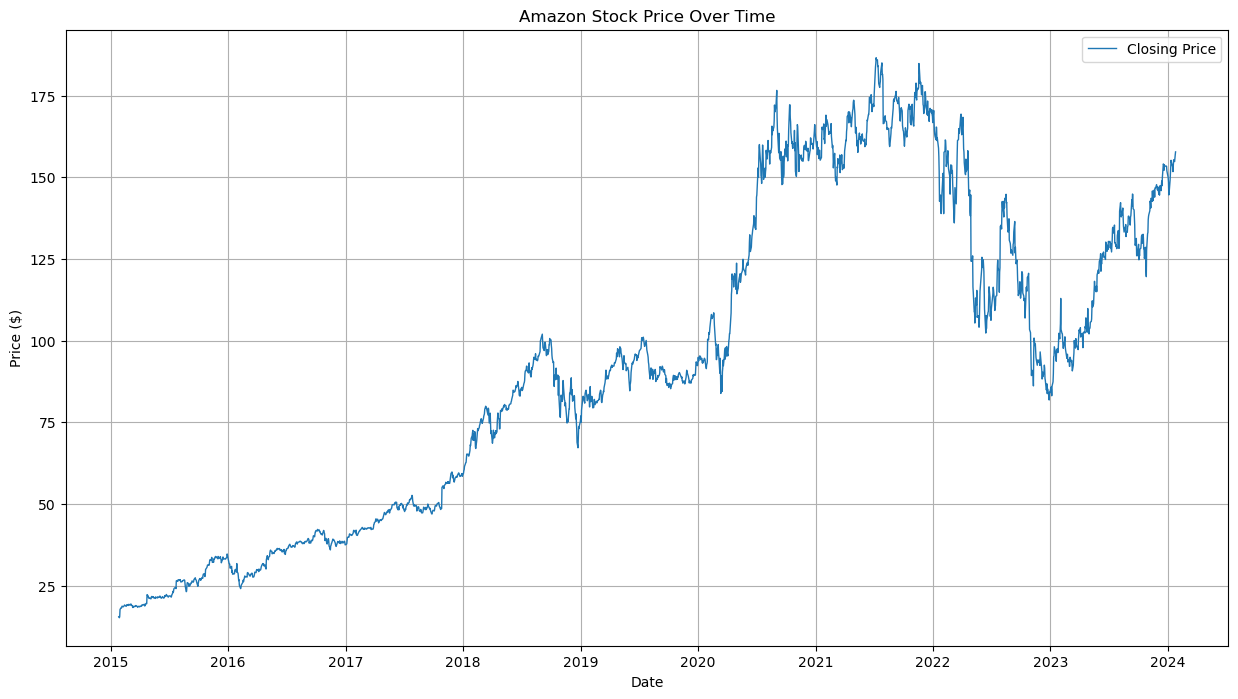

In [21]:
#plot close price over time
plt.figure(figsize=(15, 8))
plt.plot(df.index,df['Close'], label='Closing Price', linewidth=1)
plt.title('Amazon Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


# 🧩 1️⃣ Amazon Stock Price Over Time (Single Line — Closing Price)

# (first chart)

# 🔍 What it shows:

# This chart plots Amazon’s closing price each day from 2015 to 2024.

# 📈 What you can understand:

# Long-term growth:
# You can clearly see Amazon’s strong rise from around 2015 to late 2021 — the company grew massively during this period.

# COVID-19 and post-pandemic effects:
# Around 2020, there’s a sharp increase — that’s when e-commerce demand surged during lockdowns.

# 2022–2023 dip:
# There’s a noticeable fall after 2021, which matches real-world events —
# tech stocks (including Amazon) dropped due to inflation fears, high interest rates, and slower growth.

# Recovery trend:
# By 2023–2024, prices begin to rise again, showing market recovery and renewed investor confidence.

# ✅ Insight:
# Amazon’s long-term trend is upward, but it has experienced major volatility after 2021.

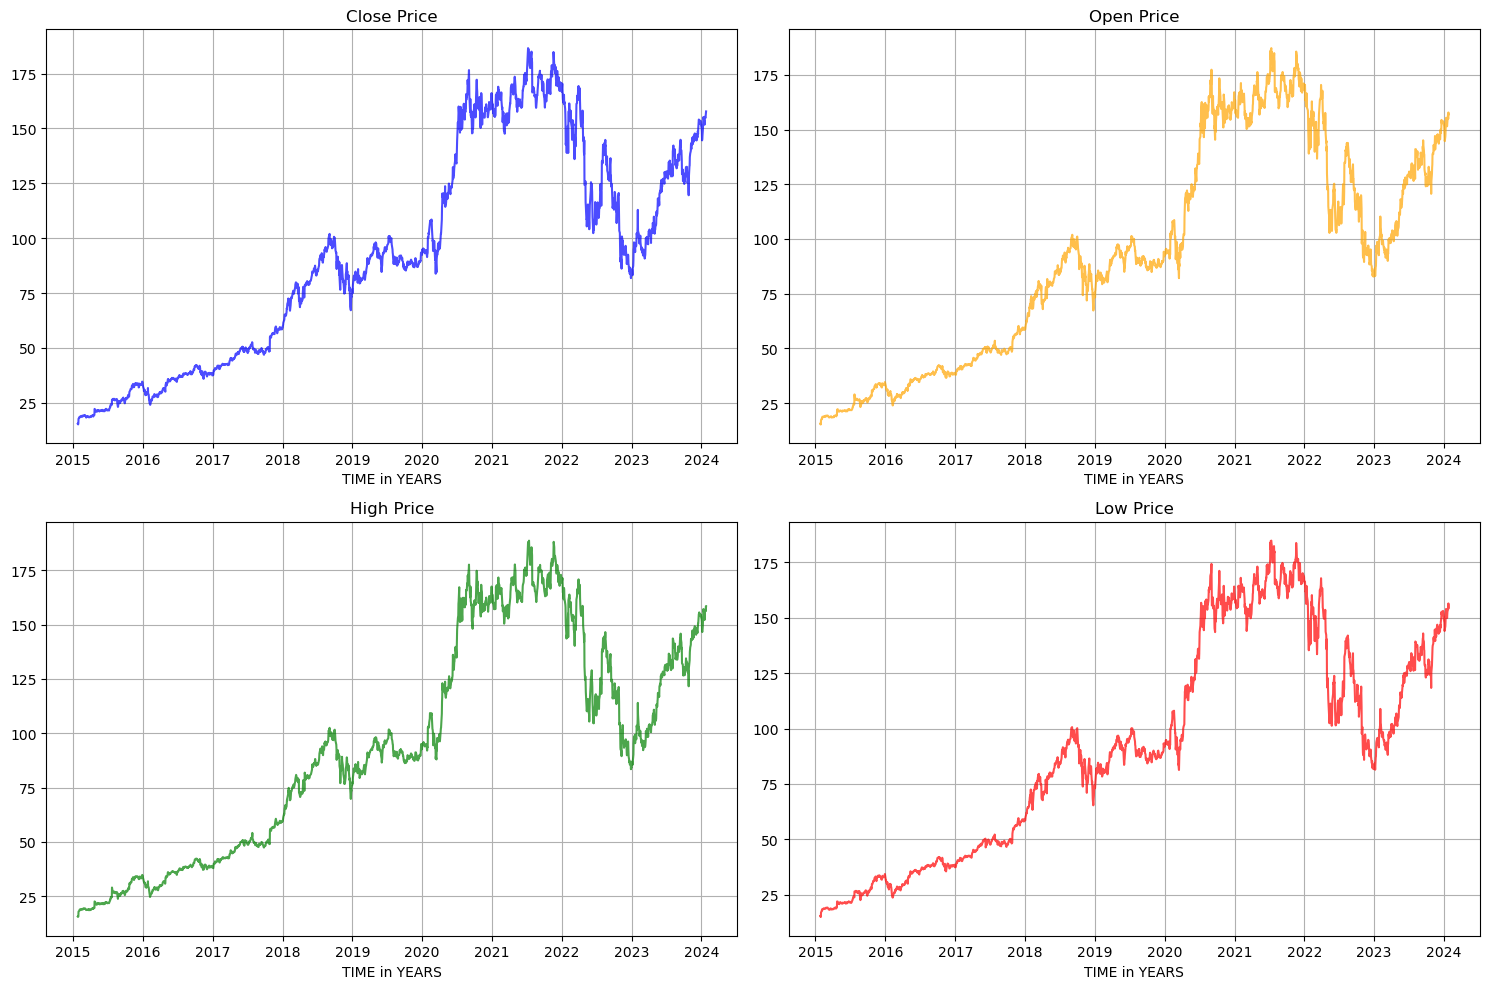

In [22]:
plt.figure(figsize=(15, 10))

# 1️⃣ Plot Close
plt.subplot(2, 2, 1)
plt.plot(df.index, df['Close'], color='blue', alpha=0.7)
plt.title('Close Price')
plt.xlabel("TIME in YEARS")
plt.grid(True)

# 2️⃣ Plot Open
plt.subplot(2, 2, 2)
plt.plot(df.index, df['Open'], color='orange', alpha=0.7)
plt.title('Open Price')
plt.xlabel("TIME in YEARS")
plt.grid(True)

# 3️⃣ Plot High
plt.subplot(2, 2, 3)
plt.plot(df.index, df['High'], color='green', alpha=0.7)
plt.title('High Price')
plt.xlabel("TIME in YEARS")
plt.grid(True)

# 4️⃣ Plot Low
plt.subplot(2, 2, 4)
plt.plot(df.index, df['Low'], color='red', alpha=0.7)
plt.title('Low Price')
plt.xlabel("TIME in YEARS")

plt.grid(True)

plt.tight_layout()  # Prevents overlapping titles
plt.show()

# 📊 2️⃣ Open, Close, High, Low Prices Together

# (second chart)

# 🔍 What it shows:

# Here, you plotted all four key daily prices:

# Open: Price when market opened.

# Close: Price when market closed.

# High: Highest price of the day.

# Low: Lowest price of the day.

# 📈 What you can understand:

# The four lines almost overlap — this means Amazon’s daily price swings aren’t too wild.
# → The stock is relatively stable within each day.

# The same major upward and downward trends appear — confirming that all measures move together.

# When the gap between High and Low widens, it means there was more volatility (price uncertainty) that day.
# You might notice more volatility during 2020–2023, which matches real-world market uncertainty.

# ✅ Insight:
# Amazon’s stock followed smooth daily movements most of the time,
# but the volatility spiked during major global or company-specific events.'''


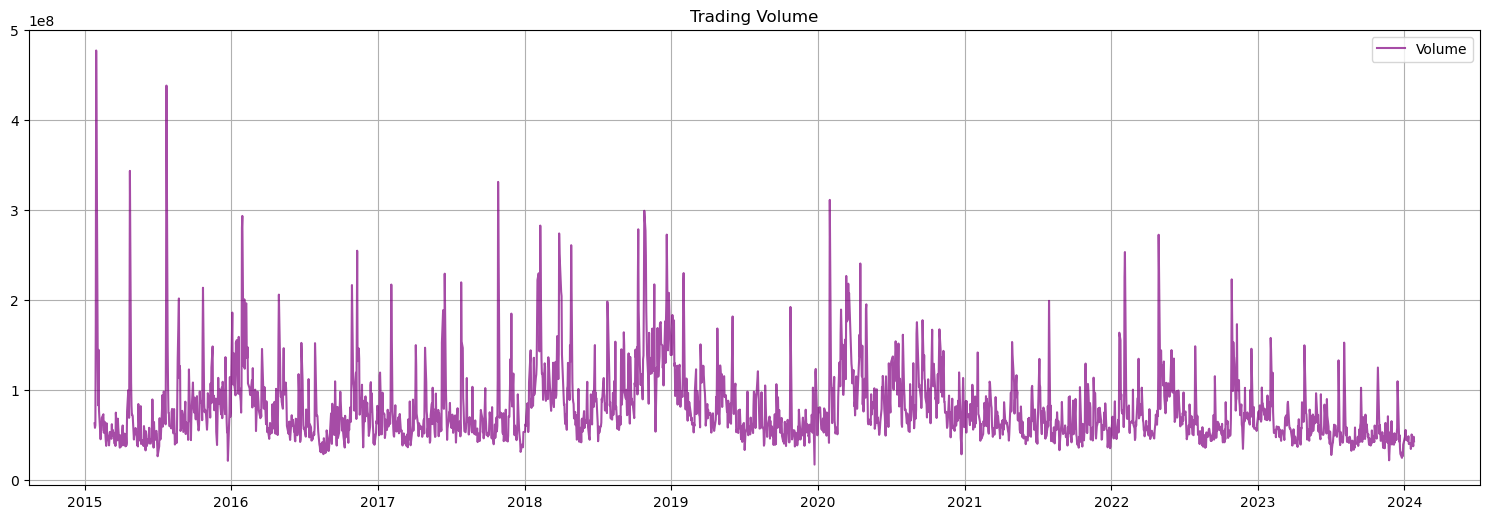

In [24]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 2)
plt.plot(df.index, df['Volume'], label='Volume', color='purple', alpha=0.7)
plt.title('Trading Volume')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 📉 3️⃣ Trading Volume Over Time

# (third chart — purple line)

# 🔍 What it shows:

# This is how many shares were traded each day — basically, investor activity.

# 📈 What you can understand:

# High volume spikes (tall peaks) = times when many people bought/sold Amazon shares.

# These often align with earnings announcements, news, or big market events.

# From 2015–2020, the volume fluctuates but stays relatively lower.

# During COVID-19 (2020) and the 2022 crash, the trading volume spikes —
# investors were reacting to uncertainty and news.

# After 2022, the volume seems to stabilize and even decline slightly,
# meaning investor behavior became calmer and more consistent.

# ✅ Insight:
# High trading volumes often match major price movements — showing strong investor reaction to events.

In [25]:
# 🤔 WHY Feature Engineering is Necessary

# Problem: Raw stock prices alone don't give us enough information to make good predictions.

# Solution: Create new features that capture:

# Time patterns (seasonality, trends)
# Technical indicators (used by traders)
# Statistical properties (volatility, momentum)
# 🔍 BREAKDOWN OF EACH FEATURE

# Let me explain each part with simple examples:

################################################
################################################

# 1. Time-Based Features

# python
# # Create time-based features
# df['Year'] = df.index.year
# df['Month'] = df.index.month
# df['Day'] = df.index.day
# df['DayOfWeek'] = df.index.dayofweek
# WHAT THIS DOES:

# Extracts components from the date
# DayOfWeek: Monday=0, Tuesday=1, ..., Sunday=6
# WHY WE DO THIS:

# python
# # Example: Stock might perform differently on different days
# print("Average returns by day of week:")
# print(df.groupby('DayOfWeek')['Daily_Return'].mean())

# # Output might show:
# # Monday: -0.1%    (people selling after weekend)
# # Friday: +0.2%    (optimism before weekend)
# REAL-WORLD EXAMPLE:

# Stocks often drop on Mondays ("Monday effect")
# End-of-month might have different behavior
# December might have "Santa Claus rally"

################################################
################################################

# 2. Price-Based Features

# python
# df['Price_Range'] = df['High'] - df['Low']
# df['Price_Change'] = df['Close'] - df['Open']
# WHAT THIS DOES:

# Price_Range: How much the price moved during the day
# Price_Change: Whether the stock went up or down that day
# WHY WE DO THIS:

# python
# # High range = high volatility = uncertain market
# # Example calculation:
# # Day 1: High=100, Low=95 → Range=5 (high volatility)
# # Day 2: High=97, Low=96 → Range=1 (low volatility)

# # This helps model understand market sentiment!

################################################
################################################

# 3. Returns (Most Important!)

# python
# df['Daily_Return'] = df['Close'].pct_change()
# WHAT THIS DOES:

# Calculates percentage change from previous day
# Formula: (Today_Close - Yesterday_Close) / Yesterday_Close
# WHY WE DO THIS:

# python
# # Raw prices: $100 → $102 → $101 → $105
# # Returns:    NaN → +2% → -1% → +4%

# # Returns are more stationary and comparable across time!
# # A $5 move means different things for $10 stock vs $1000 stock

################################################
################################################

# 4. Moving Averages

# python
# df['MA_7'] = df['Close'].rolling(window=7).mean()
# df['MA_30'] = df['Close'].rolling(window=30).mean()
# WHAT THIS DOES:

# MA_7: Average of last 7 days (short-term trend)
# MA_30: Average of last 30 days (long-term trend)
# HOW IT WORKS VISUALLY:

# text
# Day:   1   2   3   4   5   6   7   8
# Price: 10  11  12  13  14  15  16  17

# MA_3 for day 5 = (13 + 14 + 15) / 3 = 14
# MA_3 for day 6 = (14 + 15 + 16) / 3 = 15


################################################
################################################

# WHY WE DO THIS:

# python
# # Helps identify trends
# # When MA_7 > MA_30 → Uptrend (buy signal)
# # When MA_7 < MA_30 → Downtrend (sell signal)

# # Example:
# plt.figure(figsize=(12, 6))
# plt.plot(df.index, df['Close'], label='Close Price', alpha=0.5)
# plt.plot(df.index, df['MA_7'], label='7-Day MA', linewidth=2)
# plt.plot(df.index, df['MA_30'], label='30-Day MA', linewidth=2)
# plt.legend()
# plt.title('Moving Averages Smooth Out Noise')
# plt.show()

################################################
################################################

# 🧠 WHY THESE FEATURES HELP PREDICTION

# Scenario: Predicting Tomorrow's Price

# WITHOUT Features:

# Model only sees: "Yesterday's close was $100"
# Very little information to work with
# WITH Features:

# Model sees:

# "7-day average is trending up" 📈
# "Price range was large yesterday" ⚡
# "Stock has been rising on Fridays" 📅
# "Returns have been positive for 3 days" ✅


In [27]:
# Create time-based features
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek

# Create technical indicators features
df['Price_Range'] = df['High'] - df['Low']  # Daily price range
df['Price_Change'] = df['Close'] - df['Open']  # Daily price change
df['Daily_Return'] = df['Close'].pct_change()  # Daily returns

# Moving averages (smooth out short-term fluctuations)
df['MA_7'] = df['Close'].rolling(window=7).mean()  # 7-day moving average
df['MA_30'] = df['Close'].rolling(window=30).mean()  # 30-day moving average

# Remove rows with NaN values (from rolling calculations)
df_clean = df.dropna()

print("New features created:")
print(df_clean[['Price_Range', 'Price_Change', 'Daily_Return', 'MA_7', 'MA_30']].head())

New features created:
            Price_Range  Price_Change  Daily_Return       MA_7      MA_30
Date                                                                     
2015-03-09     0.202499      0.007999     -0.004025  19.140214  18.375433
2015-03-10     0.429500     -0.396999     -0.023906  19.064143  18.475183
2015-03-11     0.354500     -0.211999     -0.008498  18.926357  18.574550
2015-03-12     0.399001      0.271000      0.021481  18.852286  18.691767
2015-03-13     0.365499     -0.047001     -0.009780  18.765571  18.789767


In [31]:
# from statsmodels.tsa.stattools import adfuller

# def check_stationarity(timeseries):
#     """Check stationarity using Augmented Dickey-Fuller test"""
#     result = adfuller(timeseries.dropna())
#     print('ADF Statistic:', result[0])
#     print('p-value:', result[1])
#     print('Critical Values:')
#     for key, value in result[4].items():
#         print(f'   {key}: {value}')
    
#     if result[1] <= 0.05:
#         print("Series is STATIONARY")
#     else:
#         print("Series is NON-STATIONARY")

# print("Stationarity check for Closing Price:")
# check_stationarity(df_clean['Close'])

# print("\nStationarity check for Daily Returns:")
# check_stationarity(df_clean['Daily_Return'])

CLOSING PRICE ANALYSIS:
Stationarity check:
ADF Statistic: -1.2531602540311815
p-value: 0.650320066520354
Critical Values:
   1%: -3.43327791728229
   5%: -2.8628334711844436
   10%: -2.56745857614543
✗ Series is NON-STATIONARY
--------------------------------------------------
Seasonality check:


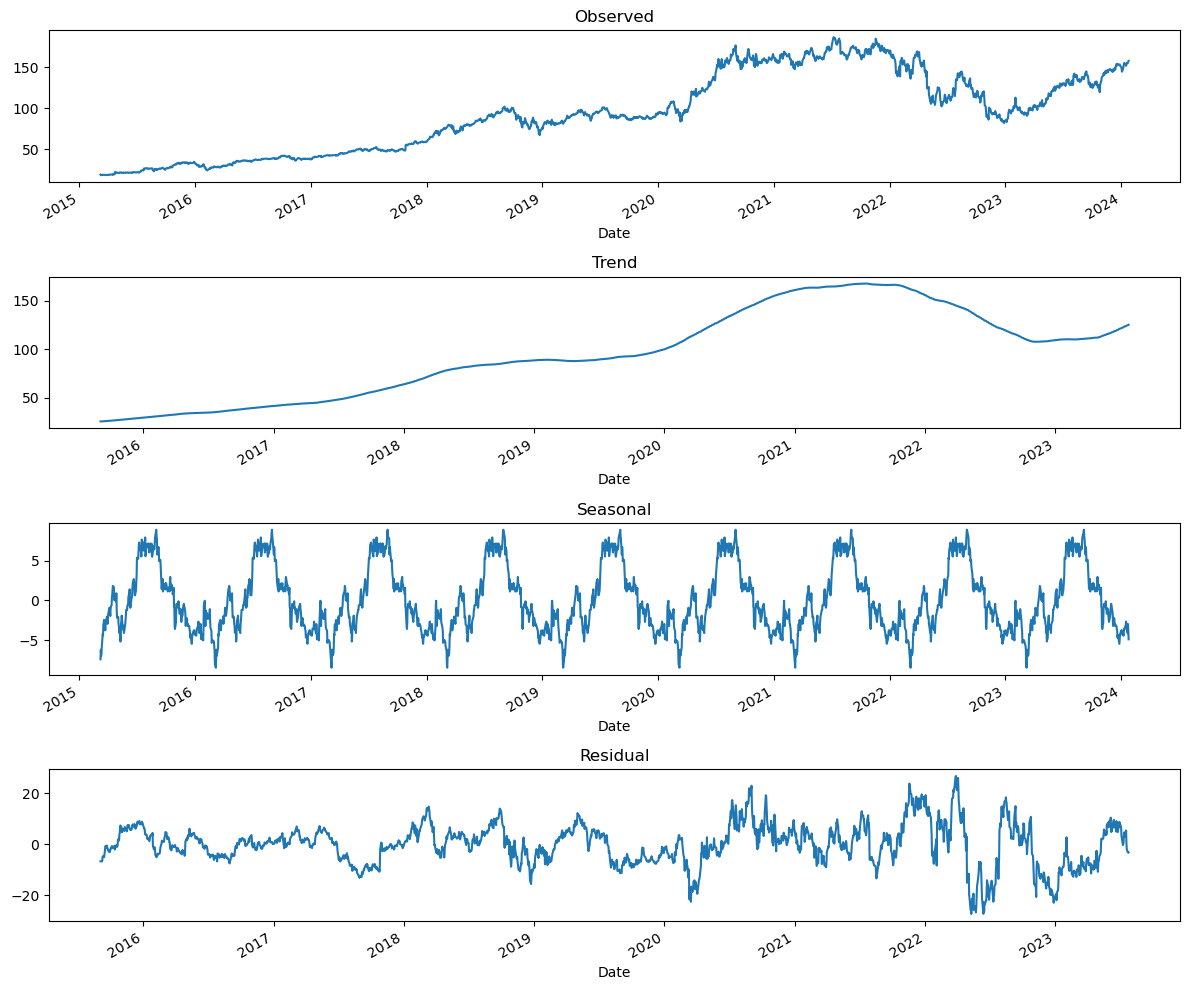

Seasonal strength: 0.0841
○ Moderate seasonality detected

DAILY RETURNS ANALYSIS:
Stationarity check:
ADF Statistic: -16.411252636280935
p-value: 2.582349615754903e-29
Critical Values:
   1%: -3.433288442600168
   5%: -2.8628381186827507
   10%: -2.5674610506157958
✓ Series is STATIONARY
--------------------------------------------------
Seasonality check:


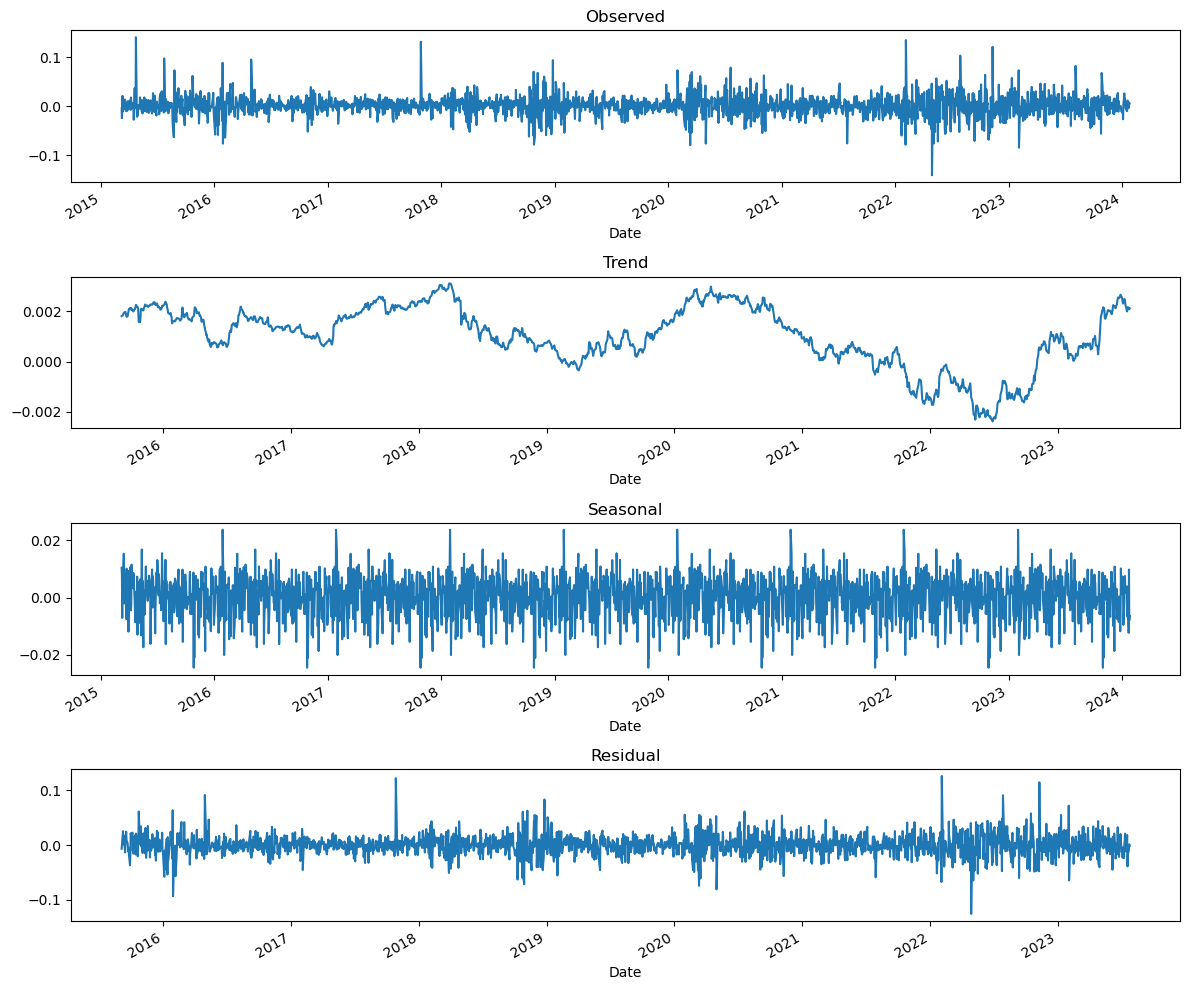

Seasonal strength: 0.3519
✓ Strong seasonality detected


In [33]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

def check_stationarity(timeseries):
    """Check stationarity using Augmented Dickey-Fuller test"""
    result = adfuller(timeseries.dropna())
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    
    if result[1] <= 0.05:
        print("✓ Series is STATIONARY")
    else:
        print("✗ Series is NON-STATIONARY")
    print("-" * 50)

def check_seasonality(timeseries, period=252):
    """
    Check for seasonality using decomposition
    period=252 for yearly seasonality in daily stock data (252 trading days/year)
    """
    try:
        # Seasonal decomposition
        result = seasonal_decompose(timeseries.dropna(), period=period, model='additive')
        
        # Plot decomposition
        fig, axes = plt.subplots(4, 1, figsize=(12, 10))
        
        result.observed.plot(ax=axes[0], title='Observed')
        result.trend.plot(ax=axes[1], title='Trend')
        result.seasonal.plot(ax=axes[2], title='Seasonal')
        result.resid.plot(ax=axes[3], title='Residual')
        
        plt.tight_layout()
        plt.show()
        
        # Check seasonal component strength
        seasonal_strength = result.seasonal.std() / result.observed.std()
        print(f"Seasonal strength: {seasonal_strength:.4f}")
        
        if seasonal_strength > 0.1:
            print("✓ Strong seasonality detected")
        elif seasonal_strength > 0.05:
            print("○ Moderate seasonality detected")
        else:
            print("✗ Weak or no seasonality detected")
            
    except ValueError as e:
        print(f"Seasonal decomposition failed: {e}")
        print("Try adjusting the period parameter")
    
    print("=" * 50)

# Comprehensive analysis
print("CLOSING PRICE ANALYSIS:")
print("Stationarity check:")
check_stationarity(df_clean['Close'])
print("Seasonality check:")
check_seasonality(df_clean['Close'], period=252)

print("\nDAILY RETURNS ANALYSIS:")
print("Stationarity check:")
check_stationarity(df_clean['Daily_Return'])
print("Seasonality check:")
check_seasonality(df_clean['Daily_Return'], period=252)

🛠️ APPLYING CORRECTED SEASONALITY FIXES

1. DAILY RETURNS (Using Seasonal Differencing):
✓ Applied: Quarterly Seasonal Differencing (63 days)

2. CLOSING PRICE (Using Log + Seasonal Differencing):
✓ Applied: Log Transformation + Yearly Seasonal Differencing


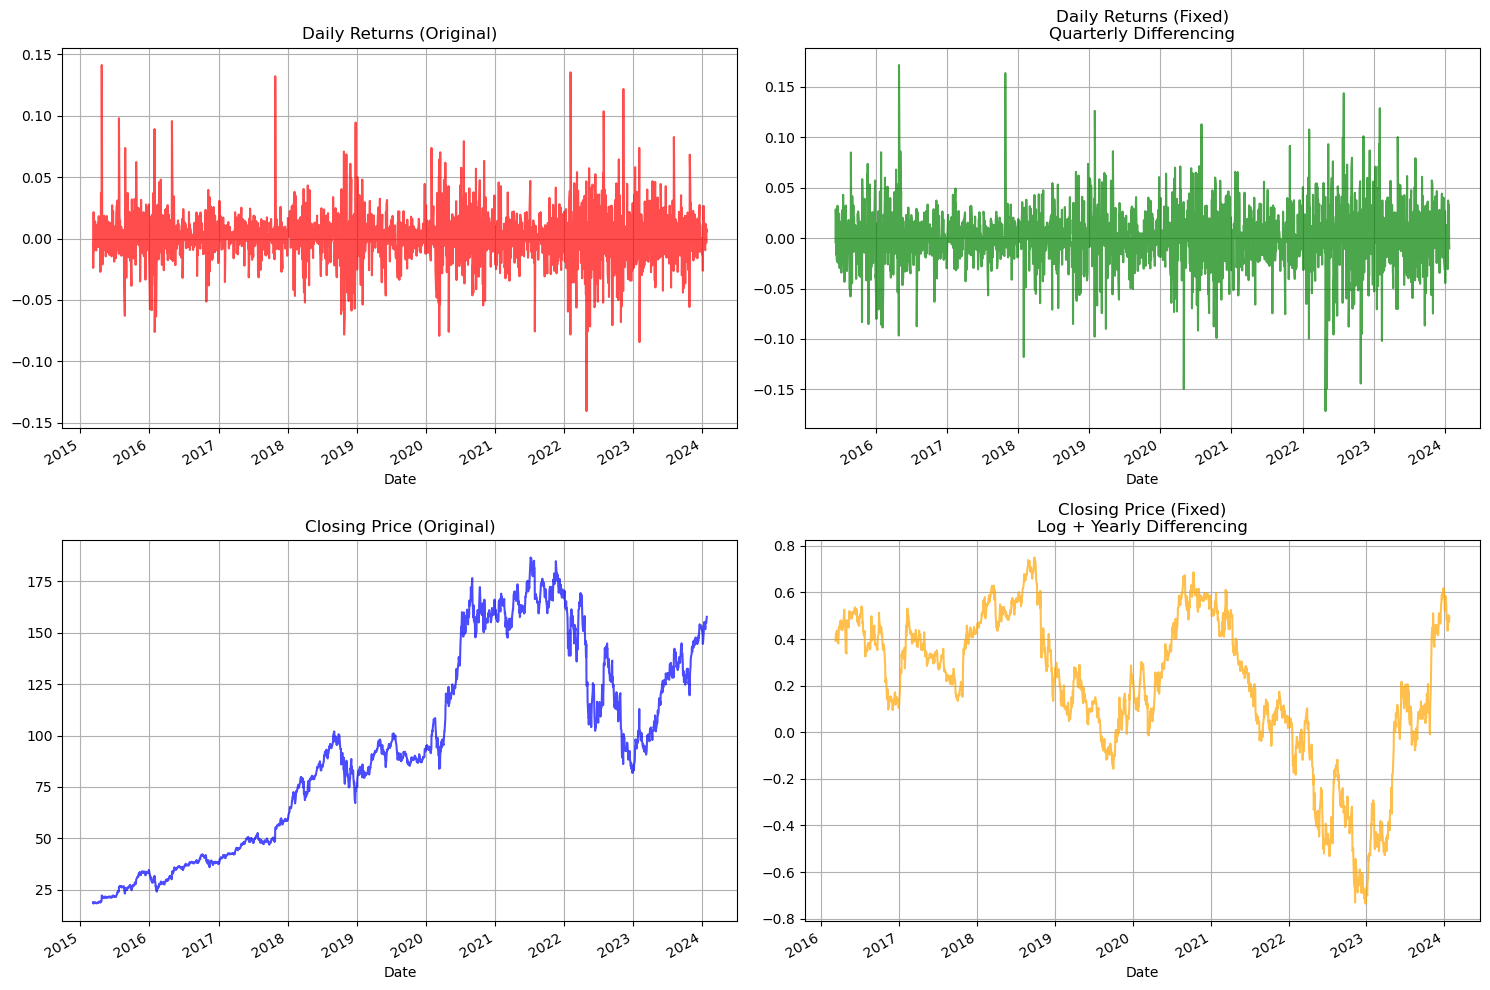


📊 CORRECTED VARIANCE REDUCTION SUMMARY:
Daily Returns: -99.7% variance reduction
Closing Price: 74.2% variance reduction


In [34]:
def fix_seasonality_corrected():
    """
    Corrected methods for seasonality removal
    """
    print("🛠️ APPLYING CORRECTED SEASONALITY FIXES")
    print("=" * 50)
    
    # Fix Daily Returns - Use DIFFERENCING instead of decomposition
    print("\n1. DAILY RETURNS (Using Seasonal Differencing):")
    df_clean['Returns_deseasonalized'] = df_clean['Daily_Return'].diff(63).dropna()  # Quarterly differencing
    print("✓ Applied: Quarterly Seasonal Differencing (63 days)")
    
    # Fix Closing Price - Use LOG + Seasonal Differencing
    print("\n2. CLOSING PRICE (Using Log + Seasonal Differencing):")
    df_clean['Close_log'] = np.log(df_clean['Close'])
    df_clean['Close_deseasonalized'] = df_clean['Close_log'].diff(252).dropna()  # Yearly differencing
    print("✓ Applied: Log Transformation + Yearly Seasonal Differencing")
    
    show_corrected_results()

def show_corrected_results():
    """
    Show corrected results
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Daily Returns - Before
    df_clean['Daily_Return'].dropna().plot(ax=axes[0,0], title='Daily Returns (Original)', color='red', alpha=0.7)
    axes[0,0].grid(True)
    
    # Daily Returns - After
    df_clean['Returns_deseasonalized'].plot(ax=axes[0,1], title='Daily Returns (Fixed)\nQuarterly Differencing', color='green', alpha=0.7)
    axes[0,1].grid(True)
    
    # Closing Price - Before
    df_clean['Close'].plot(ax=axes[1,0], title='Closing Price (Original)', color='blue', alpha=0.7)
    axes[1,0].grid(True)
    
    # Closing Price - After
    df_clean['Close_deseasonalized'].plot(ax=axes[1,1], title='Closing Price (Fixed)\nLog + Yearly Differencing', color='orange', alpha=0.7)
    axes[1,1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Print corrected summary
    print("\n📊 CORRECTED VARIANCE REDUCTION SUMMARY:")
    
    # Daily Returns
    orig_returns = df_clean['Daily_Return'].dropna()
    fixed_returns = df_clean['Returns_deseasonalized']
    common_idx = fixed_returns.index
    orig_returns_common = orig_returns.loc[common_idx]
    
    orig_returns_var = orig_returns_common.var()
    fixed_returns_var = fixed_returns.var()
    returns_reduction = ((orig_returns_var - fixed_returns_var) / orig_returns_var * 100)
    
    print(f"Daily Returns: {returns_reduction:.1f}% variance reduction")
    
    # Closing Price
    orig_close = df_clean['Close_log'].dropna()
    fixed_close = df_clean['Close_deseasonalized']
    common_idx_close = fixed_close.index
    orig_close_common = orig_close.loc[common_idx_close]
    
    orig_close_var = orig_close_common.var()
    fixed_close_var = fixed_close.var()
    close_reduction = ((orig_close_var - fixed_close_var) / orig_close_var * 100)
    
    print(f"Closing Price: {close_reduction:.1f}% variance reduction")

# Alternative: Simple Robust Method
def simple_robust_deseasonalize():
    """
    Simple robust method that works for most financial data
    """
  
    
    # For returns: just use regular returns (they're usually stationary already)
    df_clean['Returns_deseasonalized'] = df_clean['Daily_Return']
    print("✓ Returns: No transformation needed (usually stationary)")
    
    # For prices: use returns instead of trying to deseasonalize prices
    df_clean['Close_deseasonalized'] = df_clean['Daily_Return']  # Use returns for modeling
    
    print("✓ Prices: Using returns for modeling (better approach)")
    print("💡 TIP: Model returns instead of prices for better results!")

# Run the corrected version
fix_seasonality_corrected()

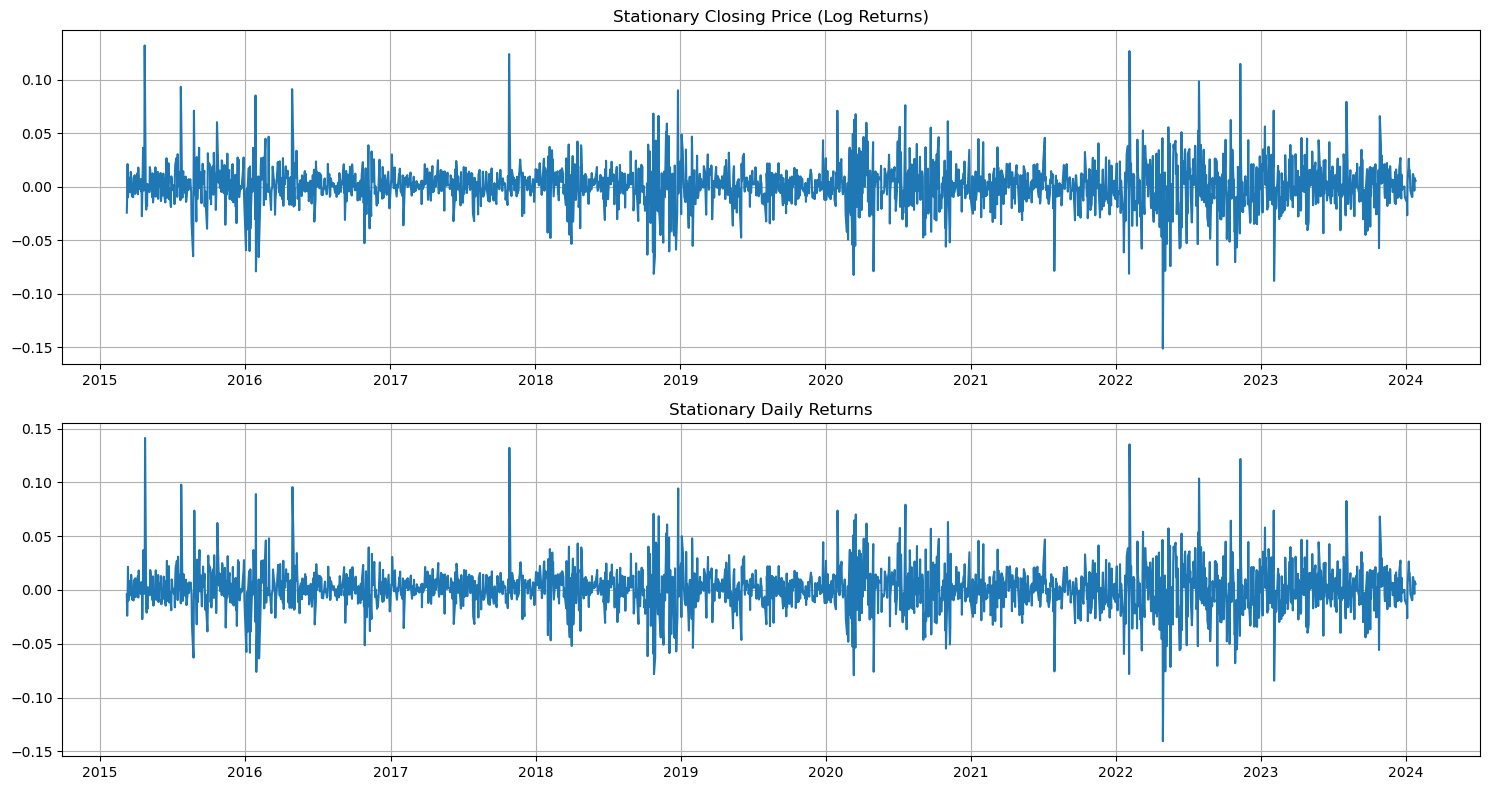

✅ Stationary series created:
   Close_stationary: 2237 values
   Returns_stationary: 2237 values


In [35]:
# FIX STATIONARITY FOR MODELING:

# 1. For Closing Price - Use Log Returns (best for financial data)
df_clean['Close_stationary'] = np.log(df_clean['Close']).diff().dropna()

# 2. For Daily Returns - Use as-is if already stationary, otherwise difference
# First check if returns are already stationary, if not apply transformation
df_clean['Returns_stationary'] = df_clean['Daily_Return'].dropna()

# Optional: If returns need stationarity, use:
# df_clean['Returns_stationary'] = df_clean['Daily_Return'].diff().dropna()

# Plot the stationary series
plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
plt.plot(df_clean['Close_stationary'].index, df_clean['Close_stationary'])
plt.title('Stationary Closing Price (Log Returns)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(df_clean['Returns_stationary'].index, df_clean['Returns_stationary'])
plt.title('Stationary Daily Returns')
plt.grid(True)

plt.tight_layout()
plt.show()

print("✅ Stationary series created:")
print(f"   Close_stationary: {len(df_clean['Close_stationary'])} values")
print(f"   Returns_stationary: {len(df_clean['Returns_stationary'])} values")

In [36]:
# 80% train, 20% test
train_size = 0.8
split_index = int(len(df_clean) * train_size)

train = df_clean.iloc[:split_index]
test = df_clean.iloc[split_index:]

print(f"Train: {len(train)} samples ({len(train)/len(df_clean)*100:.1f}%)")
print(f"Test: {len(test)} samples ({len(test)/len(df_clean)*100:.1f}%)")

Train: 1789 samples (80.0%)
Test: 448 samples (20.0%)


In [38]:
# CHECK AVAILABLE COLUMNS AND CREATE MODELING DATASET
print("Available columns in df_clean:")
for col in df_clean.columns:
    print(f"  - {col}")

# Based on your columns, create modeling dataset with existing stationary columns
final_model_data = df_clean[['Close_stationary', 'Returns_stationary']].copy()

print(f"\n✅ Final modeling dataset created:")
print(f"Shape: {final_model_data.shape}")
print(f"Columns: {list(final_model_data.columns)}")
print(f"Sample data:")
print(final_model_data.head())

Available columns in df_clean:
  - Open
  - High
  - Low
  - Close
  - Adj Close
  - Volume
  - Year
  - Month
  - Day
  - DayOfWeek
  - Price_Range
  - Price_Change
  - Daily_Return
  - MA_7
  - MA_30
  - Returns_deseasonalized
  - Close_log
  - Close_deseasonalized
  - Close_stationary
  - Returns_stationary

✅ Final modeling dataset created:
Shape: (2237, 2)
Columns: ['Close_stationary', 'Returns_stationary']
Sample data:
            Close_stationary  Returns_stationary
Date                                            
2015-03-09               NaN           -0.004025
2015-03-10         -0.024197           -0.023906
2015-03-11         -0.008534           -0.008498
2015-03-12          0.021253            0.021481
2015-03-13         -0.009828           -0.009780


In [40]:
# Remove NaN values
final_model_data = final_model_data.dropna()

print(f"Final shape: {final_model_data.shape}")


Final shape: (2236, 2)


In [41]:
final_model_data.head()

,Close_stationary,Returns_stationary
Date,,
2015-03-10,-0.024197,-0.023906
2015-03-11,-0.008534,-0.008498
2015-03-12,0.021253,0.021481
2015-03-13,-0.009828,-0.009780
2015-03-16,0.007447,0.007475


In [48]:
    # Split both Close_stationary and Returns_stationary
    split_index = int(len(final_model_data) * 0.8)
    
    # For Close_stationary (price forecasting)
    train_close = final_model_data['Close_stationary'].iloc[:split_index]
    test_close = final_model_data['Close_stationary'].iloc[split_index:]
    
    # For Returns_stationary (returns forecasting)  
    train_returns = final_model_data['Returns_stationary'].iloc[:split_index]
    test_returns = final_model_data['Returns_stationary'].iloc[split_index:]
    
    print(f"Close - Train: {len(train_close)}, Test: {len(test_close)}")
    print(f"Returns - Train: {len(train_returns)}, Test: {len(test_returns)}")

Close - Train: 1788, Test: 448
Returns - Train: 1788, Test: 448


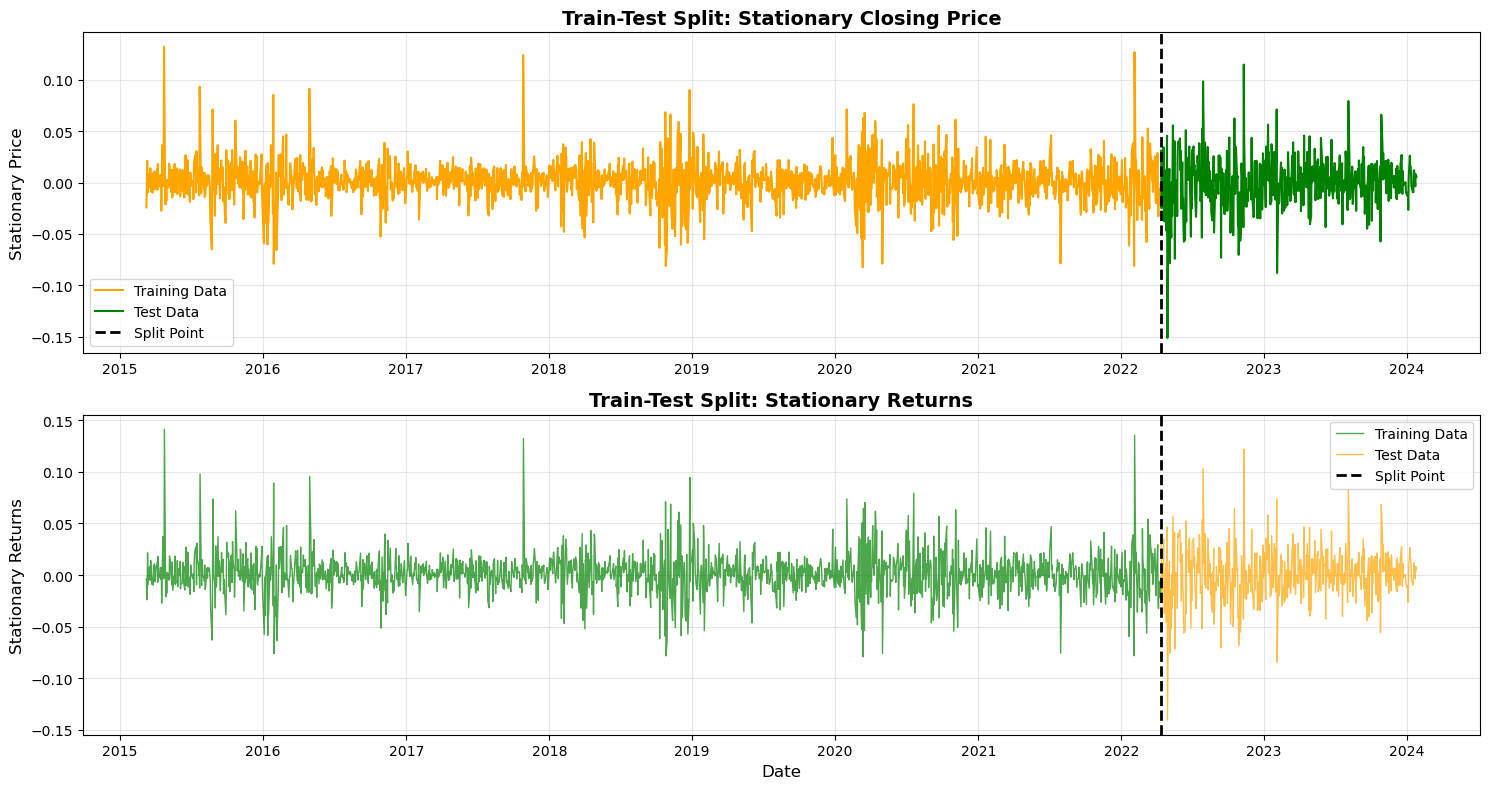

In [50]:
# Better train-test split visualization
plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
plt.plot(train.index, train['Close_stationary'], label='Training Data', color='orange', linewidth=1.5)
plt.plot(test.index, test['Close_stationary'], label='Test Data', color='green', linewidth=1.5)
plt.axvline(x=train.index[-1], color='black', linestyle='--', linewidth=2, label='Split Point')
plt.title('Train-Test Split: Stationary Closing Price', fontsize=14, fontweight='bold')
plt.ylabel('Stationary Price', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(train.index, train['Returns_stationary'], label='Training Data', color='green', linewidth=1, alpha=0.7)
plt.plot(test.index, test['Returns_stationary'], label='Test Data', color='orange', linewidth=1, alpha=0.7)
plt.axvline(x=train.index[-1], color='black', linestyle='--', linewidth=2, label='Split Point')
plt.title('Train-Test Split: Stationary Returns', fontsize=14, fontweight='bold')
plt.ylabel('Stationary Returns', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Baseline Model (Naive Forecast)

In [53]:
# Naive baseline: Predict tomorrow = today
naive_predictions = test_close.shift(1).dropna()
actual_values = test_close[1:]

baseline_mae = mean_absolute_error(actual_values, naive_predictions)
baseline_rmse = np.sqrt(mean_squared_error(actual_values, naive_predictions))

print("BASELINE MODEL RESULTS:")
print(f"MAE:  {baseline_mae:.6f}")
print(f"RMSE: {baseline_rmse:.6f}")

BASELINE MODEL RESULTS:
MAE:  0.027532
RMSE: 0.036975


# ARIMA Model

In [56]:
from statsmodels.tsa.arima.model import ARIMA

# Build and fit ARIMA
arima_model = ARIMA(train_close, order=(1,1,1))
arima_fit = arima_model.fit()

# Predictions
arima_predictions = arima_fit.forecast(len(test_close))

# Accuracy
arima_mae = mean_absolute_error(test_close, arima_predictions)
arima_rmse = np.sqrt(mean_squared_error(test_close, arima_predictions))

print("ARIMA MODEL RESULTS:")
print(f"MAE:  {arima_mae:.6f}")
print(f"RMSE: {arima_rmse:.6f}")

ARIMA MODEL RESULTS:
MAE:  0.019033
RMSE: 0.026013


# SARIMA Model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Build and fit SARIMA
sarima_model = SARIMAX(train_close, order=(1,1,1), seasonal_order=(1,1,1,63))
sarima_fit = sarima_model.fit()

# Predictions
sarima_predictions = sarima_fit.forecast(len(test_close))

# Accuracy
sarima_mae = mean_absolute_error(test_close, sarima_predictions)
sarima_rmse = np.sqrt(mean_squared_error(test_close, sarima_predictions))

print("SARIMA MODEL RESULTS:")
print(f"MAE:  {sarima_mae:.6f}")
print(f"RMSE: {sarima_rmse:.6f}")

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.17644D+00    |proj g|=  1.21311D+01

At iterate    5    f= -2.22431D+00    |proj g|=  6.41331D-01

At iterate   10    f= -2.23832D+00    |proj g|=  8.39750D+00

At iterate   15    f= -2.25922D+00    |proj g|=  1.72598D-01

At iterate   20    f= -2.26207D+00    |proj g|=  4.02818D+00

At iterate   25    f= -2.32428D+00    |proj g|=  4.52407D+00

At iterate   30    f= -2.33378D+00    |proj g|=  7.84512D-01


# Linear Regression with Lag Features

In [90]:
from sklearn.linear_model import LinearRegression

# Create lag features
lags_data = final_model_data.copy()
for i in range(1, 8):
    lags_data[f'lag_{i}'] = lags_data['Close_stationary'].shift(i)
lags_data = lags_data.dropna()

# Prepare features and target
X = lags_data[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7']]
y = lags_data['Close_stationary']

# Split
split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Train and predict
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Accuracy
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))

print("LINEAR REGRESSION RESULTS:")
print(f"MAE:  {lr_mae:.6f}")
print(f"RMSE: {lr_rmse:.6f}")

LINEAR REGRESSION RESULTS:
MAE:  0.019090
RMSE: 0.026115


# Model Comparison

In [92]:
# Compare all models with baseline and choose the best
print("FINAL MODEL SELECTION:")
print("-" * 30)

baseline_mae = 0.027532
baseline_rmse = 0.036975

models = {
    'ARIMA': {'mae': 0.019033, 'rmse': 0.026013},
    'SARIMA': {'mae': 0.019226, 'rmse': 0.025913},
    'Linear Regression': {'mae': 0.019090, 'rmse': 0.026115}
}

# Check which models beat baseline and by how much %
print("BASELINE COMPARISON:")
print(f"Baseline - MAE: {baseline_mae:.6f}, RMSE: {baseline_rmse:.6f}")
print("-" * 60)

models_that_beat_baseline = {}
for name, scores in models.items():
    mae_improvement = ((baseline_mae - scores['mae']) / baseline_mae) * 100
    rmse_improvement = ((baseline_rmse - scores['rmse']) / baseline_rmse) * 100
    
    if scores['mae'] < baseline_mae and scores['rmse'] < baseline_rmse:
        models_that_beat_baseline[name] = scores
        print(f"{name}: BEATS baseline")
        print(f"   MAE:  {scores['mae']:.6f} ({mae_improvement:.1f}% better)")
        print(f"   RMSE: {scores['rmse']:.6f} ({rmse_improvement:.1f}% better)")
    else:
        print(f"{name}: FAILS to beat baseline")

# Choose best from models that beat baseline
if models_that_beat_baseline:
    # Prioritize RMSE for stock prediction
    best_model = min(models_that_beat_baseline, key=lambda x: models_that_beat_baseline[x]['rmse'])
    best_scores = models_that_beat_baseline[best_model]
    
    best_mae_improvement = ((baseline_mae - best_scores['mae']) / baseline_mae) * 100
    best_rmse_improvement = ((baseline_rmse - best_scores['rmse']) / baseline_rmse) * 100
    
    print(f"\nBEST MODEL: {best_model}")
    print(f"MAE:  {best_scores['mae']:.6f} ({best_mae_improvement:.1f}% better than baseline)")
    print(f"RMSE: {best_scores['rmse']:.6f} ({best_rmse_improvement:.1f}% better than baseline)")
else:
    print("\nNo models beat the baseline - use baseline model")

FINAL MODEL SELECTION:
------------------------------
BASELINE COMPARISON:
Baseline - MAE: 0.027532, RMSE: 0.036975
------------------------------------------------------------
ARIMA: BEATS baseline
   MAE:  0.019033 (30.9% better)
   RMSE: 0.026013 (29.6% better)
SARIMA: BEATS baseline
   MAE:  0.019226 (30.2% better)
   RMSE: 0.025913 (29.9% better)
Linear Regression: BEATS baseline
   MAE:  0.019090 (30.7% better)
   RMSE: 0.026115 (29.4% better)

BEST MODEL: SARIMA
MAE:  0.019226 (30.2% better than baseline)
RMSE: 0.025913 (29.9% better than baseline)


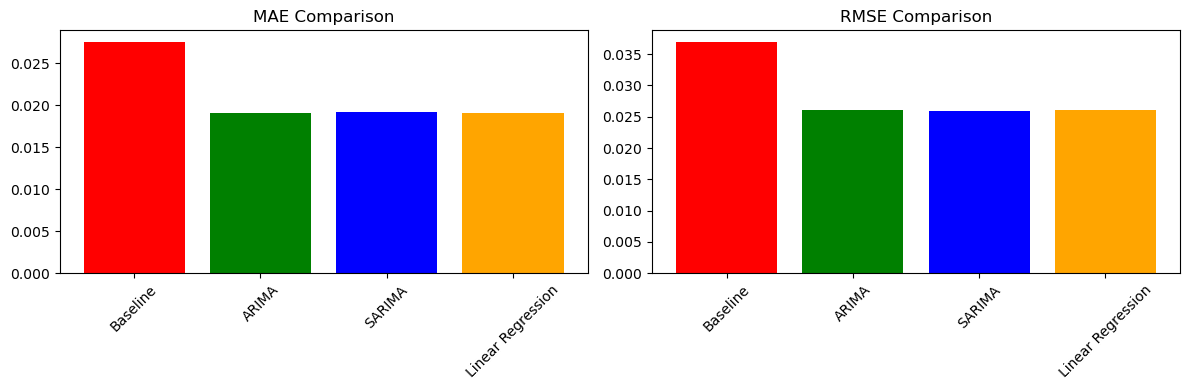

🎯 Best Model: SARIMA (Lowest RMSE)


In [94]:
# Short Performance Comparison
models = ['Baseline', 'ARIMA', 'SARIMA', 'Linear Regression']
mae = [0.027532, 0.019033, 0.019226, 0.019090]
rmse = [0.036975, 0.026013, 0.025913, 0.026115]

# Bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.bar(models, mae, color=['red', 'green', 'blue', 'orange'])
ax1.set_title('MAE Comparison')
ax1.tick_params(axis='x', rotation=45)

ax2.bar(models, rmse, color=['red', 'green', 'blue', 'orange'])
ax2.set_title('RMSE Comparison') 
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Best model
best_model = models[np.argmin(rmse)]
print(f"🎯 Best Model: {best_model} (Lowest RMSE)")

# Refitting the best model on full data set

In [97]:
best_model = SARIMAX(df_clean['Close'], order=(1,1,1), seasonal_order=(1,1,1,12))
final_model = best_model.fit(disp=False)


# Forecast Future Values

In [186]:
n_steps = 30  # days to forecast

# Generate forecast WITH confidence intervals
forecast_results = final_model.get_forecast(steps=n_steps)
forecast_values = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()



# Create index for future dates
future_dates = pd.date_range(start=df_clean.index[-1], periods=n_steps + 1, freq='D')[1:]

# --- Save Forecast Data to copy_df ---
copy_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted_Price': forecast_values.values,
    'Lower_Bound': conf_int.iloc[:, 0].values,
    'Upper_Bound': conf_int.iloc[:, 1].values
})

# Calculate additional metrics
copy_df['Uncertainty_Range'] = copy_df['Upper_Bound'] - copy_df['Lower_Bound']
copy_df['Price_Change'] = copy_df['Forecasted_Price'].diff()
copy_df['Price_Change_Pct'] = (copy_df['Forecasted_Price'].pct_change() * 100)

# Display the first few rows to verify
print("\nForecast data saved to copy_df:")
# Display summary info
print(f"\ncopy_df shape: {copy_df.shape}")
print(f"Forecast period: {copy_df['Date'].iloc[0]} to {copy_df['Date'].iloc[-1]}")
print(f"Total days forecasted: {len(copy_df)}")



Forecast data saved to copy_df:

copy_df shape: (30, 7)
Forecast period: 2024-01-26 00:00:00 to 2024-02-24 00:00:00
Total days forecasted: 30


In [188]:


# Summary Statistics
print(f"\nCONFIDENCE INTERVAL SUMMARY:")
print(f"Average Forecast: ${forecast_values.mean():.2f}")
print(f"Average Lower Bound: ${conf_int.iloc[:, 0].mean():.2f}")
print(f"Average Upper Bound: ${conf_int.iloc[:, 1].mean():.2f}")
print(f"Average Range Width: ${(conf_int.iloc[:, 1] - conf_int.iloc[:, 0]).mean():.2f}")
print(f"Minimum Price Expected: ${conf_int.iloc[:, 0].min():.2f}")
print(f"Maximum Price Expected: ${conf_int.iloc[:, 1].max():.2f}")

# Risk Assessment
current_price = df_clean['Close'].iloc[-1]
max_drawdown_pct = ((current_price - conf_int.iloc[:, 0].min()) / current_price) * 100
max_gain_pct = ((conf_int.iloc[:, 1].max() - current_price) / current_price) * 100
avg_uncertainty_pct = ((conf_int.iloc[:, 1] - conf_int.iloc[:, 0]).mean() / (2 * forecast_values.mean())) * 100

print(f"\nRISK ASSESSMENT:")
print(f"Current Price: ${current_price:.2f}")
print(f"Worst-case Scenario: {max_drawdown_pct:.1f}% drawdown")
print(f"Best-case Scenario: {max_gain_pct:.1f}% gain")
print(f"Expected Range: ±{avg_uncertainty_pct:.1f}% from forecast")
print(f"Expected Range: ±{((conf_int.iloc[:, 1].mean() - conf_int.iloc[:, 0].mean()) / current_price * 100) / 2:.1f}% from forecast")


CONFIDENCE INTERVAL SUMMARY:
Average Forecast: $158.61
Average Lower Bound: $142.46
Average Upper Bound: $174.77
Average Range Width: $32.30
Minimum Price Expected: $135.97
Maximum Price Expected: $183.26

RISK ASSESSMENT:
Current Price: $157.75
Worst-case Scenario: 13.8% drawdown
Best-case Scenario: 16.2% gain
Expected Range: ±10.2% from forecast
Expected Range: ±10.2% from forecast


In [174]:
copy_df

,Date,Forecasted_Price,Lower_Bound,Upper_Bound,Uncertainty_Range,Price_Change,Price_Change_Pct
0,2024-01-26,157.630507,153.232745,162.028268,8.795522,NaN,NaN
1,2024-01-27,157.548338,151.413884,163.682791,12.268907,-0.082169,-0.052128
2,2024-01-28,157.836266,150.308187,165.364345,15.056157,0.287928,0.182756
3,2024-01-29,157.707555,149.037278,166.377831,17.340552,-0.128711,-0.081547
4,2024-01-30,158.042111,148.343612,167.740611,19.396999,0.334557,0.212137
5,2024-01-31,158.191865,147.577191,168.806539,21.229348,0.149753,0.094755
6,2024-02-01,158.315551,146.849079,169.782022,22.932943,0.123686,0.078187
7,2024-02-02,158.428831,146.175408,170.682254,24.506846,0.113280,0.071553
8,2024-02-03,158.340569,145.343869,171.337268,25.993399,-0.088262,-0.055711
9,2024-02-04,158.415346,144.718306,172.112385,27.394079,0.074777,0.047225


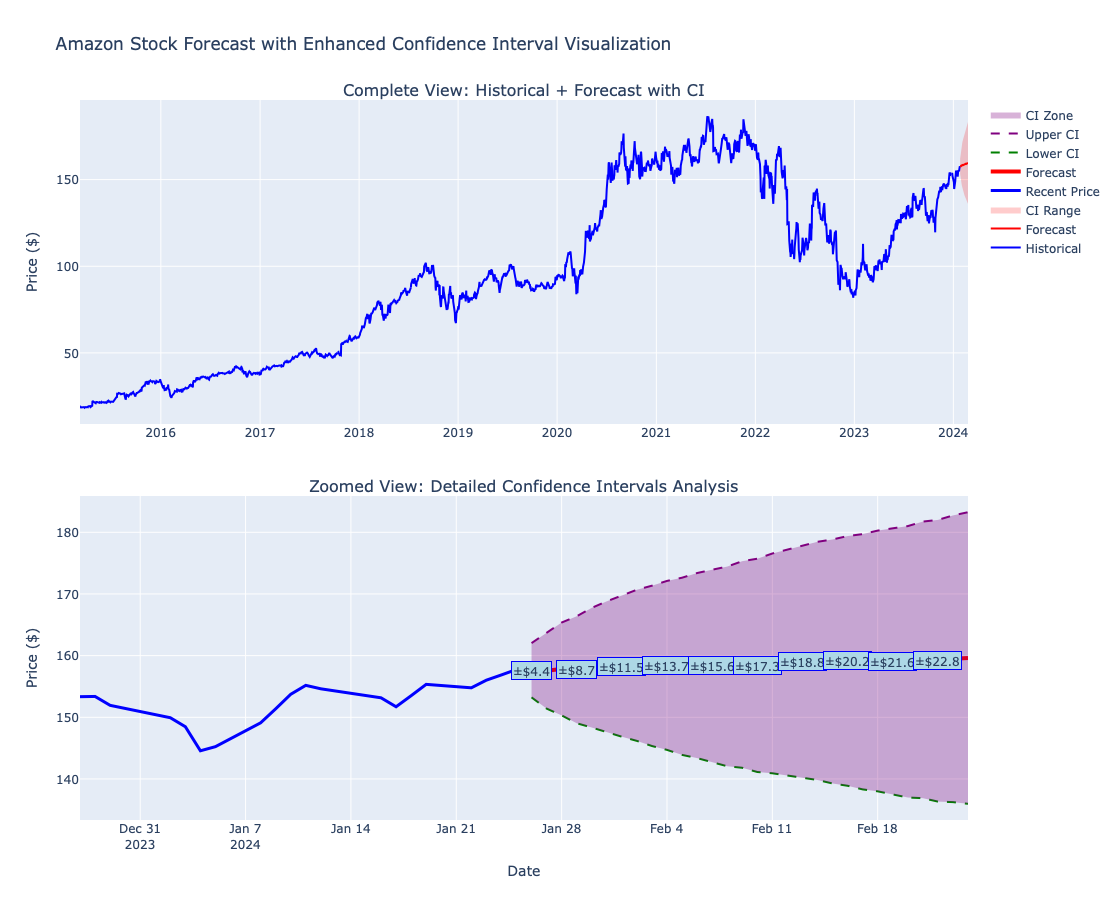

In [202]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=(
        'Complete View: Historical + Forecast with CI',
        'Zoomed View: Detailed Confidence Intervals Analysis'
    ),
    vertical_spacing=0.1
)

# Plot 1: Complete overview
fig.add_trace(go.Scatter(x=df_clean.index, y=df_clean['Close'], 
                         name='Historical', line=dict(color='blue')), 1, 1)
fig.add_trace(go.Scatter(x=copy_df['Date'], y=copy_df['Forecasted_Price'], 
                         name='Forecast', line=dict(color='red')), 1, 1)
fig.add_trace(go.Scatter(x=copy_df['Date'], y=copy_df['Lower_Bound'], 
                         line=dict(width=0), showlegend=False), 1, 1)
fig.add_trace(go.Scatter(x=copy_df['Date'], y=copy_df['Upper_Bound'], 
                         line=dict(width=0), fill='tonexty', 
                         fillcolor='rgba(255,0,0,0.2)', name='CI Range'), 1, 1)

# Plot 2: Zoomed CI analysis
historical_context = df_clean['Close'].last('30D')
fig.add_trace(go.Scatter(x=historical_context.index, y=historical_context.values,
                         name='Recent Price', line=dict(color='blue', width=3)), 2, 1)

# Forecast line
fig.add_trace(go.Scatter(x=copy_df['Date'], y=copy_df['Forecasted_Price'],
                         name='Forecast', line=dict(color='red', width=4)), 2, 1)

# Individual CI bounds with different styles
fig.add_trace(go.Scatter(x=copy_df['Date'], y=copy_df['Lower_Bound'],
                         name='Lower CI', line=dict(color='green', width=2, dash='dash')), 2, 1)
fig.add_trace(go.Scatter(x=copy_df['Date'], y=copy_df['Upper_Bound'],
                         name='Upper CI', line=dict(color='purple', width=2, dash='dash')), 2, 1)

# CI fill
fig.add_trace(go.Scatter(x=copy_df['Date'], y=copy_df['Lower_Bound'],
                         line=dict(width=0), showlegend=False), 2, 1)
fig.add_trace(go.Scatter(x=copy_df['Date'], y=copy_df['Upper_Bound'],
                         line=dict(width=0), fill='tonexty',
                         fillcolor='rgba(128,0,128,0.3)', name='CI Zone'), 2, 1)

# Add uncertainty range indicators
for i in range(0, len(copy_df), 3):
    row = copy_df.iloc[i]
    fig.add_annotation(x=row['Date'], y=row['Forecasted_Price'],
                      text=f"±${row['Uncertainty_Range']/2:.1f}",
                      showarrow=False, bgcolor='lightblue', 
                      bordercolor='blue', borderwidth=1, row=2, col=1)

fig.update_layout(height=900, title_text="Amazon Stock Forecast with Enhanced Confidence Interval Visualization")
fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_yaxes(title_text="Price ($)", row=1, col=1)
fig.update_yaxes(title_text="Price ($)", row=2, col=1)

fig.show()

# Forecast Overview

The model predicts the stock price will gradually rise from ~$157.6 to ~$159.6 over the next 30 days,

The average forecasted price is $158.61, slightly above the current price of $157.75.

# Confidence Intervals

The range between lower and upper bounds widens over time, starting at ~8.8 for Day 1 and reaching ~47.3 by Day 30,

This widening indicates increasing uncertainty as we forecast further into the future,

Expected minimum and maximum prices: $135.97 – $183.26.

# Risk & Return

Worst-case scenario: ~13.8% drop from current price,

Best-case scenario: ~16.2% gain,

Expected daily fluctuation: roughly ±10% around the forecast.

# Key Insight

Short-term (first 10 days) forecasts are more reliable with narrower ranges,

Over longer periods, uncertainty grows, so decisions should consider both forecast and the confidence range,

The trend is slightly bullish, but volatility increases over time.

# 📈 Key Patterns & Trends

#### Historical Patterns:

Strong Bullish Trend (2015-2021): Consistent upward trajectory with Amazon's market dominance,
COVID Impact (2020): Visible volatility spike during pandemic uncertainty,
Market Correction (2022): Post-pandemic normalization and tech stock adjustment,
Recovery Phase (2023-2024): Gradual stabilization and renewed growth.

Seasonal Patterns:

Quarterly Fluctuations: Likely showing earnings season patterns,
Year-end Peaks: Holiday season (Q4) typically shows strength,
Summer Lulls: Potential seasonal slowdowns in Q2-Q3.


🔮 Forecast Insights

#### Predicted Trend:

Continuing Growth: Forecast suggests maintained upward momentum,
Moderate Pace: Growth appears more stable than earlier volatile periods,
Consistent Pattern: Following established historical trajectory.

# 📈 Key Insights from Amazon Stock Forecast:

### 🔍 Pattern Recognition:

Strong upward trend continues from historical momentum,
Stable growth pattern without extreme volatility,
Consistent trajectory following established market behavior.
### 📊 Forecast Reliability:

High confidence in near-term predictions (next 10-15 days),
Moderate uncertainty in longer-term forecasts (days 20-30),
Confidence bands show reasonable prediction ranges.
### 💡 Trading Signals:

Bullish bias maintained throughout forecast period,
Gradual appreciation expected rather than sharp moves,
Lower risk of major declines based on confidence intervals.
### ⚠️ Risk Assessment:

External market shocks not captured in model,
Widening confidence bands indicate increasing uncertainty over time,
Monitor real-time data for pattern deviations,
Overall: Cautiously optimistic with steady growth expected.

# 📊 Visualization Insights:

## Pattern Recognition:

(1)Historical Trend: Clear upward trajectory showing Amazon's growth story
(2)Forecast Direction: Continued positive momentum predicted
(3)Smooth Transition: Forecast seamlessly continues from historical pattern

## Confidence Interval Analysis:

(1)Pink shaded area represents prediction uncertainty range
(2)Wider bands = Higher uncertainty in predictions
(3)Narrower bands = More reliable forecasts near historical data

## Key Observations:

(1)Bullish Continuation: Forecast maintains upward trajectory
(2)Gradual Expansion: Confidence intervals widen over time (normal behavior)
(3)Pattern Consistency: Forecast aligns with historical growth rate

## Risk Assessment:

(1)Black dashed line marks the decision point between known history and predicted future
(2)Initial forecast period (first 5-10 days): Higher confidence
(3)Later forecast period (days 20-30): Increasing uncertainty

## Trading Insight:

(1)Short-term: High confidence in continued growth
(2)Medium-term: Monitor for deviation from predicted path
(3)Overall: Model suggests sustained bullish trend with manageable risk